<div style="text-align:center">
    <h1>
        Policy Iteration
    </h1>
<br>

## Import software libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from envs import Maze
from utils import plot_policy, plot_values, test_agent

## Initialize the environment

In [2]:
env = Maze()

2022-08-25 06:45:38.849 python[817:8703] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7f8512cb6560>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-08-25 06:45:38.849 python[817:8703] Warning: Expected min height of view: (<NSButton: 0x7f85141331b0>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-08-25 06:45:38.852 python[817:8703] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7f8512feed60>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-08-25 06:45:38.854 python[817:8703] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7f8512ff1200>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.


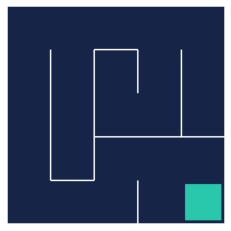

In [3]:
frame = env.render(mode='rgb_array')
plt.axis('off')
plt.imshow(frame)

In [4]:
print(f"Observation space shape: {env.observation_space.nvec}")
print(f"Number of actions: {env.action_space.n}")

Observation space shape: [5 5]
Number of actions: 4


## Define the policy $\pi(\cdot|s)$

#### Create the policy $\pi(\cdot|s)$

In [5]:
policy_probs = np.full((5, 5, 4), 0.25)

In [6]:
def policy(state):
    return policy_probs[state]

#### Test the policy with state (0, 0)

In [7]:
action_probabilities = policy((0,0))
for action, prob in zip(range(4), action_probabilities):
    print(f"Probability of taking action {action}: {prob}")

Probability of taking action 0: 0.25
Probability of taking action 1: 0.25
Probability of taking action 2: 0.25
Probability of taking action 3: 0.25


#### See how the random policy does in the maze

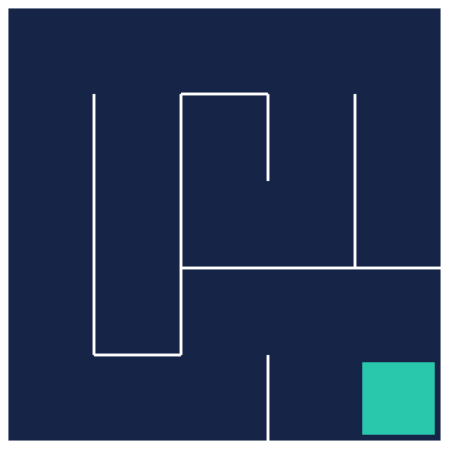

In [8]:
test_agent(env, policy, episodes=1)

#### Plot the policy

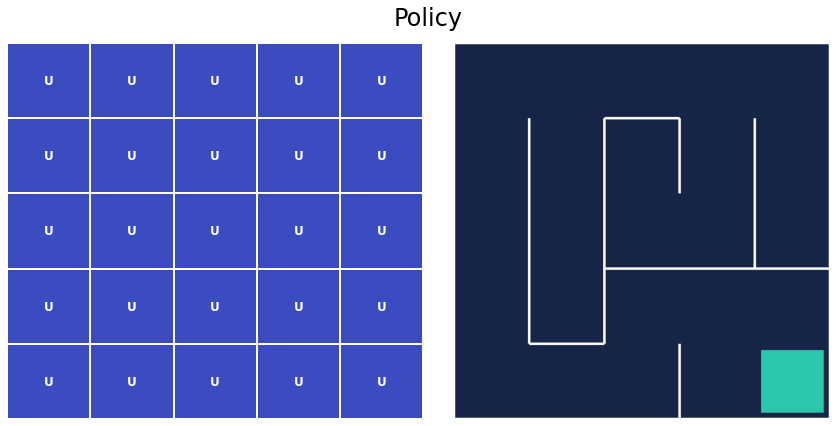

In [9]:
plot_policy(policy_probs, frame)

## Define value table $V(s)$

#### Create the $V(s)$ table

In [10]:
state_values = np.zeros(shape=(5,5))

#### Plot $V(s)$

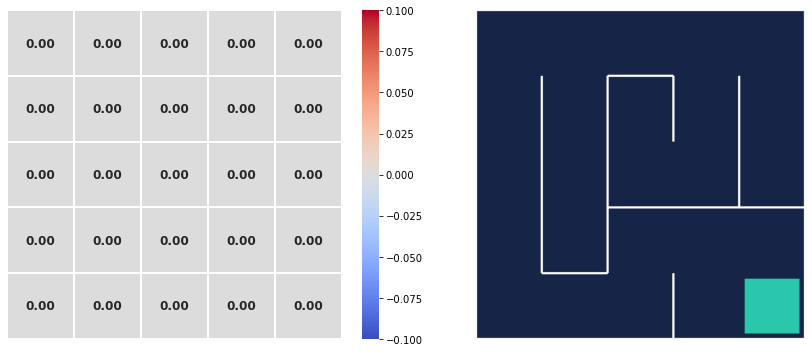

In [11]:
plot_values(state_values, frame)

## Implement the Policy Iteration algorithm

</br>

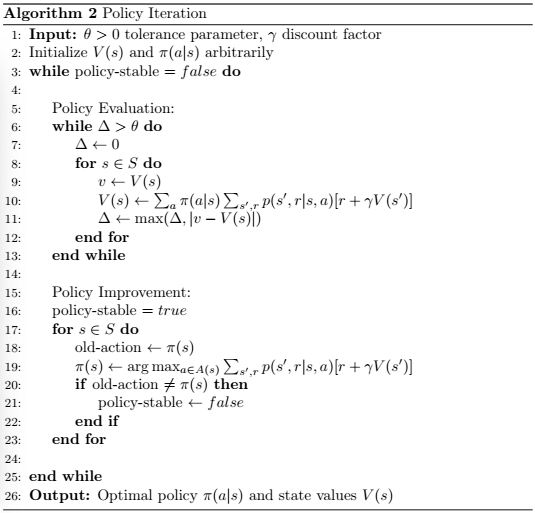

<div style="text-align:center">
    Adapted from Barto & Sutton: "Reinforcement Learning: An Introduction".
</div>

In [12]:
def policy_evaluation(policy_probe, state_values, theta = 1e-6, gamma = 0.99):
    delta = float("inf")
    
    while delta > theta:
        delta = 0
        
        for row in range(5):
            for col in range(5): #each box in the table
                old_value = state_values[(row, col)]
                new_value = 0.
                action_probabilities = policy_probs[(row, col)]
                
                for action, prob in enumerate(action_probabilities):
                    next_state, reward, _, _ = env.simulate_step((row, col), action)
                    new_value += prob * (reward + gamma * state_values[next_state])
                
                state_values[(row, col)] = new_value  #update the state value
                delta = max(delta, abs(old_value - new_value))
                

In [13]:
def policy_improvement(policy_probs, state_value, gamma= 0.99):
    policy_stable = True
    
    for row in range(5):
        for col in range(5):
            old_action = policy_probs[(row, col)].argmax()
            
            new_action = None
            max_qsa = float("-inf")
            
            for action in range(4):
                next_state, reward, _, _ =  env.simulate_step((row, col), action)
                qsa = reward + gamma * state_values[next_state]
                
                if qsa > max_qsa:
                    new_action = action
                    max_qsa = qsa
            
            action_probs = np.zeros(4)
            action_probs[new_action] = 1.
            policy_probs[(row, col)] = action_probs
            
            if new_action != old_action:
                policy_stable = False
                
    return policy_stable
    
    
    
    

In [14]:
def policy_iteration(policy_probs, state_values, theta = 1e-6, gamma = 0.99):
    policy_stable = False
    while not policy_stable:
        
        policy_evaluation(policy_probs, state_values, theta, gamma)
        plot_values(state_values, frame)
        
        policy_stable = policy_improvement(policy_probs, state_values, gamma)
        plot_policy(policy_probs, frame)

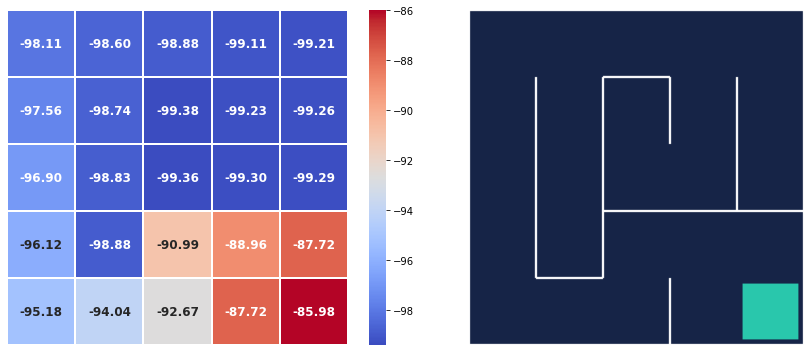

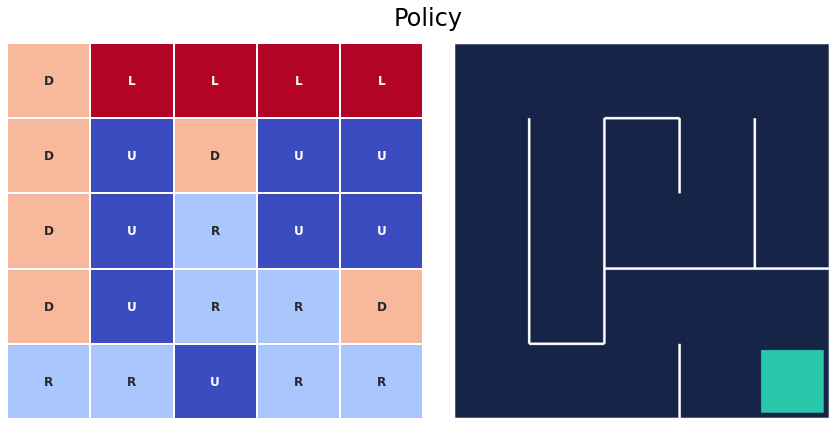

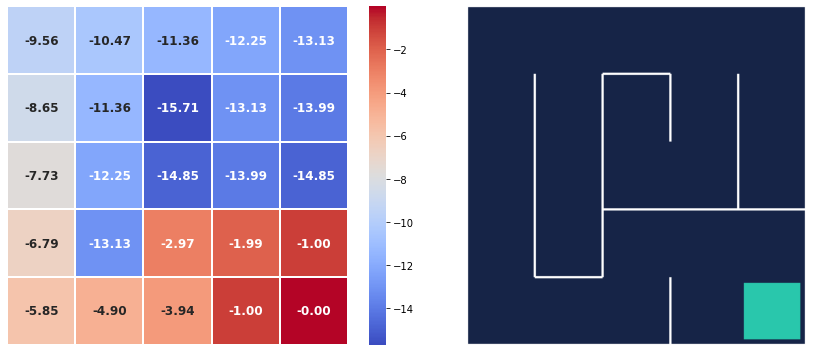

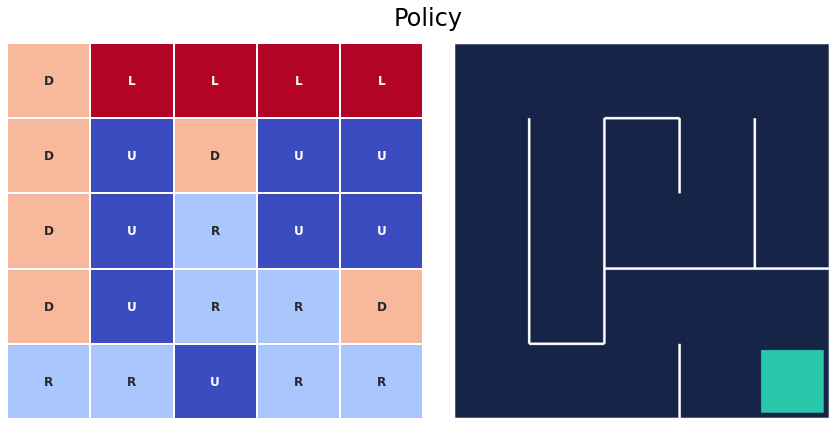

In [15]:
policy_iteration(policy_probs, state_values)

## Show results

#### Test the resulting agent

KeyboardInterrupt: 

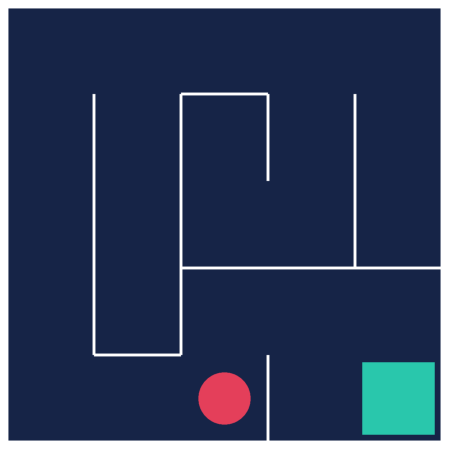

In [16]:
test_agent(env, policy)